# **Automatic number-plate recognition (ANPR; see also other names below) is a technology that uses optical character recognition on images to read vehicle registration plates to create vehicle location data. It can use existing closed-circuit television, road-rule enforcement cameras, or cameras specifically designed for the task.**

**Import and Install important packages**

In [2]:
!pip install easyocr # used to take image and write a text based on that image
!pip install imutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 kB 4.9 MB/s eta 0:00:00


`imutil` A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more easier with OpenCV and both Python 2.7 and Python 3.

In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

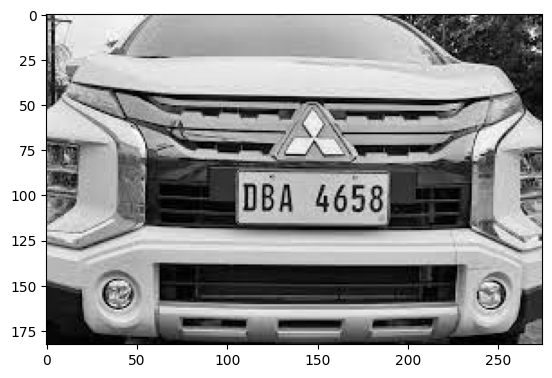

In [6]:
img = cv2.imread('/content/car_01.jpeg') # read the image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert it into grayscale
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)) 

**Don't forget matplotlib doesn't show `BGR` formation, so convert it into `RGB`**

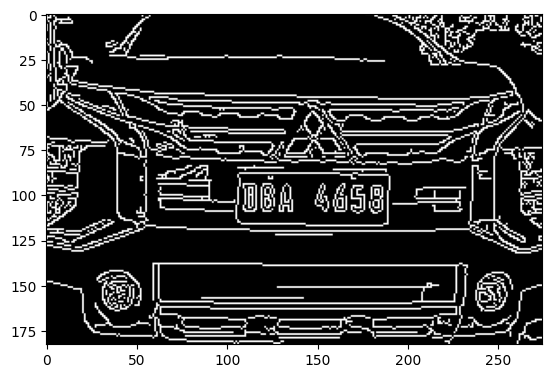

In [56]:
bfilter = cv2.bilateralFilter(gray_img,11,25,25) # The bilateral filter converts any input image (a)to a smoothed version (b). It removes most texture, noise, and fine details, but preserves large sharp edges without blurring.
canny = cv2.Canny(bfilter,30,250) 
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))


In [57]:
keys = cv2.findContours(canny.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keys) # imutils.grab_contours() simplifies the process of extracting contours from a binary image and ensures compatibility across different OpenCV versions

contours = sorted(contours, key=cv2.contourArea, reverse = True)[:10]
print(len(contours))
print(contours)

10
[array([[[ 59, 138]],

       [[ 59, 158]],

       [[ 59, 139]],

       [[ 60, 138]],

       [[ 61, 138]],

       [[ 62, 139]],

       [[ 62, 157]],

       [[ 63, 158]],

       [[ 63, 159]],

       [[ 92, 159]],

       [[ 93, 160]],

       [[202, 160]],

       [[203, 159]],

       [[226, 159]],

       [[226, 155]],

       [[227, 154]],

       [[227, 140]],

       [[229, 138]],

       [[230, 138]],

       [[231, 139]],

       [[232, 139]],

       [[233, 140]],

       [[232, 141]],

       [[232, 143]],

       [[233, 144]],

       [[232, 145]],

       [[232, 156]],

       [[231, 157]],

       [[231, 160]],

       [[229, 162]],

       [[229, 166]],

       [[230, 167]],

       [[230, 168]],

       [[229, 169]],

       [[229, 171]],

       [[228, 172]],

       [[228, 173]],

       [[227, 174]],

       [[227, 175]],

       [[226, 176]],

       [[227, 175]],

       [[227, 174]],

       [[228, 173]],

       [[228, 172]],

       [[229, 171]],

      

In [62]:
location = None
for contour in contours:
  approx_val = cv2.approxPolyDP(contour,5,True) #The 5 is the epsilon value, which specifies the maximum distance between the original contour and its approximation. 
  if len(approx_val) == 4: #Checks if the approximated polygon has four vertices, indicating it is a quadrilateral shape.
    location = approx_val # Assigns the approx_val to the location variable if the condition is met.

    break

In [63]:
location

array([[[106,  89]],

       [[108, 116]],

       [[189, 116]],

       [[189,  89]]], dtype=int32)

In [67]:
mask = np.zeros(gray_img.shape, np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img, img, mask = mask)

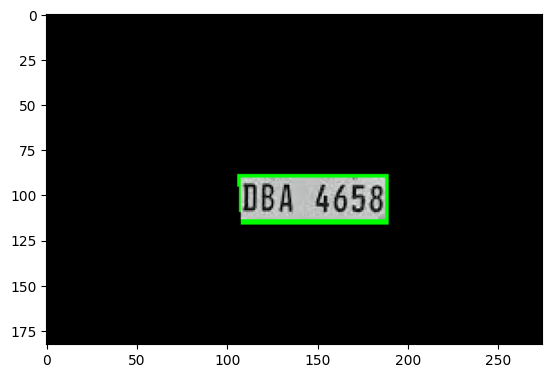

In [68]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

**Cropping on an image based on the coordinates obtained from a binary mask.**

In [22]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray_img[x1:x2+1, y1:y2+1]


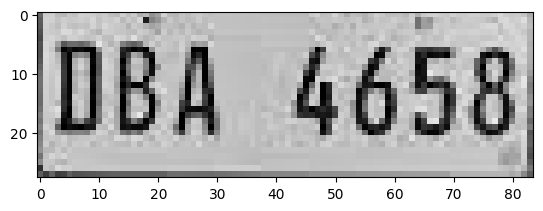

In [23]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

**Applying OCR to Read Text**

In [24]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [84, 0], [84, 26], [0, 26]], 'DBA 4658', 0.7015950276151969)]

**Get number as text**

In [27]:
text = result[0][-2]
print(f'The car number : {text}')

The car number : DBA 4658


In [33]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_PLAIN
res_total = cv2.putText(img, text = text, org = (approx_val[0][0][0], approx_val[1][0][1]+60), fontFace = font, fontScale = 1, color = (0,255,0), thickness = 2)
res_total = cv2.rectangle(img, tuple(approx_val[0][0]), tuple (approx_val[2][0]), (0,255,0),2)


This represents the coordinates of the top-left corner of the rectangle. It uses approx_val[0][0] to access the first vertex of the quadrilateral and converts it to a tuple. `tuple(approx_val[2][0]): `This represents the coordinates of the bottom-right corner of the rectangle. It uses approx_val[2][0] to access the third vertex of the quadrilateral and converts it to a tuple.

# **Show the Result**

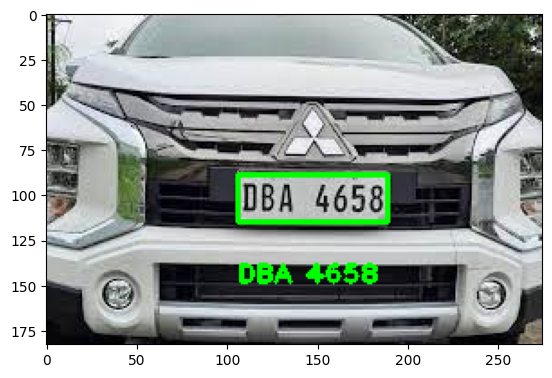

In [34]:
plt.imshow(cv2.cvtColor(res_total, cv2.COLOR_BGR2RGB))